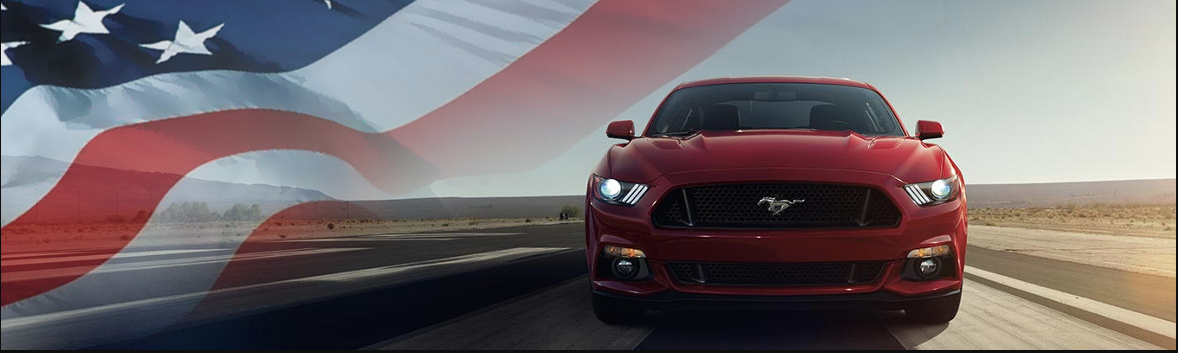

# Used Car Price Prediction in USA

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. This data create by scraping for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 16 other categories. For previous listings, check older versions of the dataset.

Columns description:
- url = url link 
- city = city source
- city_url = city url link
- price = price of the car
- year = year cars release
- manufacturer = company of the car manufacturer
- make = car model
- condition = general condition of the car
- cylinders = number of engine cylinders
- fuel = type of fuel 
- odometer = how range the car has been go
- title_status = status
- transmission = type transmission
- VIN = stand for 'Vehicle Identification Number'
- drive = fwd, rwd, or 4x4
- size = type of car size, it's define on interior volume
- type = type of car shape
- paint_color = color of the car
- image_url = url link of image
- desc = description on car listing
- lat = position of latitude
- long = posisition of longitude

# 1. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
n = 550313 
s = 11780 
listIndex = list(range(n))
skip_row = sorted(random.sample(listIndex,(n-s)))
skip_row = skip_row[1:]
fileName= 'craigslistVehicles.csv'
df = pd.read_csv(fileName, skiprows=skip_row, encoding ='latin')

In [3]:
df.head(3)

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/ctd/d/comanche-...,"abilene, TX",https://abilene.craigslist.org,13990,2005.0,ram,2500,excellent,6 cylinders,diesel,...,automatic,3D7KS28C05G839586,4wd,full-size,truck,white,https://images.craigslist.org/00M0M_gJmMOz4J0q...,2005 Dodge Ram 2500 SLT - Bright White Clearco...,31.897388,-98.615578
1,https://abilene.craigslist.org/ctd/d/arlington...,"abilene, TX",https://abilene.craigslist.org,14950,2015.0,ford,transit connect,NaN,4 cylinders,gas,...,automatic,NM0LS7F70F1220985,fwd,NaN,van,white,https://images.craigslist.org/00f0f_5ERjtHHH9Z...,DKR IncAsk for: Paul or RandyÃ¢ÂÂÃÂ (817) 2...,32.736030,-97.133644
2,https://albanyga.craigslist.org/ctd/d/la-plata...,"albany, GA",https://albanyga.craigslist.org,6488,2013.0,toyota,corolla,NaN,4 cylinders,gas,...,automatic,2T1BU4EE2DC924024,fwd,NaN,sedan,blue,https://images.craigslist.org/00f0f_ahdnAwXCIF...,"2013 *Toyota* *Corolla* BASE Sedan - $6,488Ca...",36.880420,-108.180553


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11781 entries, 0 to 11780
Data columns (total 22 columns):
url             11781 non-null object
city            11781 non-null object
city_url        11781 non-null object
price           11781 non-null int64
year            11757 non-null float64
manufacturer    11214 non-null object
make            11576 non-null object
condition       6377 non-null object
cylinders       7173 non-null object
fuel            11675 non-null object
odometer        9458 non-null float64
title_status    11689 non-null object
transmission    11689 non-null object
VIN             6734 non-null object
drive           8256 non-null object
size            3907 non-null object
type            8402 non-null object
paint_color     7881 non-null object
image_url       11780 non-null object
desc            11780 non-null object
lat             11531 non-null float64
long            11531 non-null float64
dtypes: float64(4), int64(1), object(17)
memory usage: 2.0+ 

In [5]:
df.describe()

,price,year,odometer,lat,long
count,1.178100e+04,11757.000000,9.458000e+03,11531.000000,11531.000000
mean,3.338973e+05,2008.719912,1.028220e+05,38.447579,-93.699620
std,3.489823e+07,9.670880,9.003541e+04,5.675743,17.545716
min,0.000000e+00,1915.000000,0.000000e+00,0.409504,-159.486600
25%,3.800000e+03,2006.000000,5.103550e+04,34.728610,-106.274935
50%,8.995000e+03,2011.000000,9.621350e+04,39.199100,-88.049003
75%,1.788800e+04,2015.000000,1.400462e+05,42.398900,-80.670997
max,3.787877e+09,2020.000000,4.688757e+06,64.924588,122.367000


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,url,object,0,0.00,11781,[https://harrisburg.craigslist.org/cto/d/mount...
1,city,object,0,0.00,408,"[southwest MS, wausau, WI]"
2,city_url,object,0,0.00,408,"[https://knoxville.craigslist.org, https://boo..."
3,price,int64,0,0.00,2459,"[41991, 15991]"
4,year,float64,24,0.20,91,"[1988.0, 1964.0]"
5,manufacturer,object,567,4.81,37,"[pontiac, nissan]"
6,make,object,205,1.74,3671,"[2500 quad cab, m35x]"
7,condition,object,5404,45.87,6,"[salvage, excellent]"
8,cylinders,object,4608,39.11,8,"[3 cylinders, 8 cylinders]"
9,fuel,object,106,0.90,5,"[nan, diesel]"


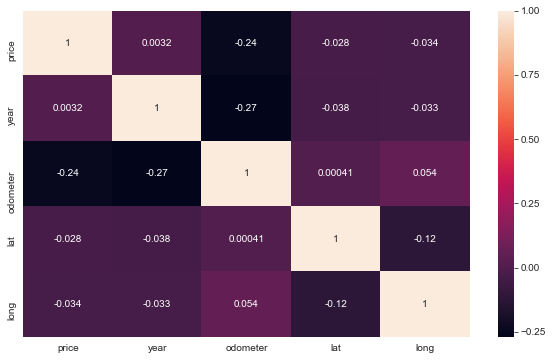

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

# 2. Data Preprocessing & Cleaning

### 2.1 Delete unimportant column

In [7]:
df.drop(['url','image_url','city_url'], axis=1, inplace=True)

### 2.2 Handle Missing Value

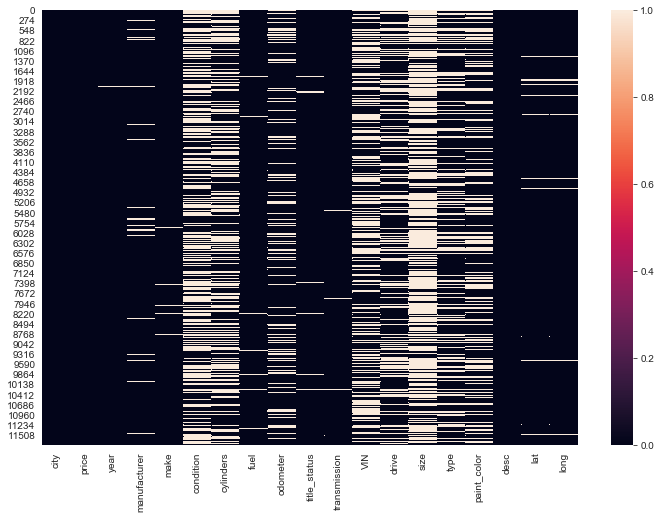

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

##### 2.2.1 VIN column ( 43.9 % missing value ) :
- Stand for Vehichle Identification Number, it's hard to define, other than that it's an unimportant feature in our model.

In [9]:
df.drop(['VIN'], axis=1, inplace=True)

##### 2.2.2 Fuel( 0.92% missing values) and  Transmission ( 0.87 % missing value ) column:
- Missing values in column 'fuel' and 'transmission'; filled with other (pre-existing category).

In [10]:
df['fuel'].fillna('other',inplace=True)
df['transmission'].fillna('other',inplace=True)

##### 2.2.3 Paint Color (32.24% missing value) and Condition (44.89% missing value) column:
- Missing values in column 'paint_color' & 'condition', filled with other, we create new value.

In [11]:
df['paint_color'].fillna('other',inplace=True)
df['condition'].fillna('other',inplace=True)

Drop row contain missing values:
- 'manufacturer' null is 4.88 percent
- 'make' null is 1.84 percent
- 'title_status' null is 0.75 percent
- 'year' null is 0.27 percent

In [12]:
df.dropna(subset=['manufacturer','make','title_status','year'],inplace=True)

##### 2.2.4 Cylinders column ( 39.71% missing value ) :
- Filled with manufakturer's cylinders mode

In [13]:
def apply_cylinders(col):
    if(pd.isna(col['cylinders'])):
        return (df[df['manufacturer'] == col['manufacturer']]['cylinders'].mode())
    else:
        return col['cylinders']

In [14]:
df['cylinders'] = df[['manufacturer','cylinders']].apply(apply_cylinders, axis=1)

In [15]:
df['cylinders'].value_counts()

8 cylinders     4074
4 cylinders     3350
6 cylinders     3275
5 cylinders      105
10 cylinders      44
other             27
3 cylinders        8
12 cylinders       6
Name: cylinders, dtype: int64

##### 2.2.5 Odometer column ( 20.05% missing value )
- Filled with year's odometer mean

In [16]:
def apply_odometer(col):
    if(pd.isna(col['odometer'])):
        return (df[df['year'] == col['year']]['odometer'].mean())
    else:
        return col['odometer']

In [17]:
df['odometer'] = df[['year','odometer']].apply(apply_odometer, axis=1)

In [18]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit

id_to_drop,upper,lower = check_outlier(df,'odometer')
df.drop(id_to_drop,inplace=True)

In [19]:
df.dropna(subset=['odometer'],inplace=True)

In [20]:
def float_to_round_int(x):
    return round(int(x))

In [21]:
df['odometer'] = df['odometer'].apply(float_to_round_int)
df['year'] = df['year'].apply(float_to_round_int)

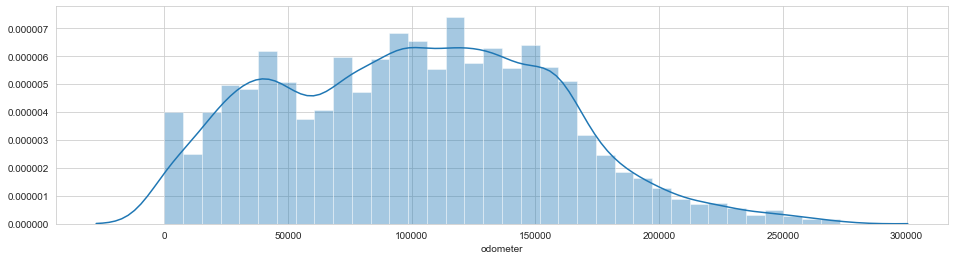

In [22]:
plt.figure(figsize=(16,4))
sns.distplot(df['odometer'])

##### 2.2.6 Drive column ( 29.47% missing value ) :
- Filled with manufakturer's drive mode

In [23]:
def apply_drive(col):
    if(pd.isna(col['drive'])):
        return (df[df['manufacturer'] == col['manufacturer']]['drive'].mode())
    else:
        return col['drive']

In [24]:
df['drive'] = df[['manufacturer','drive']].apply(apply_drive, axis=1)

In [25]:
df['drive'].value_counts()

4wd    5256
fwd    3891
rwd    1634
Name: drive, dtype: int64

##### 2.2.7 Size column ( 66.89% missing value ) :
- Filled with make's size mode

In [26]:
def apply_size(col):
    if(pd.isna(col['size'])):
        return (df[df['make'] == col['make']]['size'].mode())
    else:
        return col['size']

In [27]:
df['size'] = df[['make','size']].apply(apply_size, axis=1)

In [28]:
df.dropna(subset=['size'],inplace=True)

In [29]:
df['size'].value_counts()

full-size      4771
mid-size       2368
compact        1273
sub-compact     176
Name: size, dtype: int64

##### 2.2.8 Lat and Long column ( 2.22 % missing value ) :
- Filled with city's lat & long mean

First, convert city column into spesific city information

In [30]:
def convert_city_by_coma(city):
    tmp = city.split(",")
    return str(tmp[0])

def convert_city_by_dash(city):
    tmp = city.split("-")
    return str(tmp[0])

def convert_city_by_slash(city):
    tmp = city.split("/")
    return str(tmp[0])

In [31]:
df['city'] = df['city'].apply(convert_city_by_coma)
df['city'] = df['city'].apply(convert_city_by_dash)
df['city'] = df['city'].apply(convert_city_by_slash)

In [48]:
df['city'].nunique()

385

In [62]:
vc_city = df['city'].value_counts()
list_city_to_remove = vc_city[vc_city < 15].index
index_to_remove = df.loc[np.isin(df["city"], list_city_to_remove)].index
df.drop(index_to_remove , inplace=True)
df.reset_index(drop=True,inplace=True)

In [63]:
df['city'].nunique()

192

Then apply a function's to get mean of latitude & longitude

In [32]:
def apply_lat(col):
    if(pd.isna(col['lat'])):
        return (df[df['city'] == col['city']]['lat'].mean())
    else:
        return col['lat']

def apply_long(col):
    if(pd.isna(col['long'])):
        return (df[df['city'] == col['city']]['long'].mean())
    else:
        return col['long']

In [33]:
df['lat'] = df[['city','lat']].apply(apply_lat, axis=1)

In [34]:
df['long'] = df[['city','long']].apply(apply_long, axis=1)

In [35]:
df['lat'].isna().sum()

0

In [36]:
df['long'].isna().sum()

0

##### 2.2.9 Type column ( 28.77% missing value ) :
- Filled with make's type mode
- Recategory other

In [37]:
def apply_type_make(col):
    if(pd.isna(col['type'])):
        return (df[df['make'] == col['make']]['type'].mode())
    else:
        return col['type']
    

In [38]:
df['type'] = df[['make','type']].apply(apply_type_make, axis=1)

In [39]:
df['type'].fillna('other',inplace=True)

In [40]:
df['type'].value_counts()

sedan          2416
SUV            2333
pickup         1084
truck          1025
coupe           424
hatchback       275
wagon           270
mini-van        221
convertible     173
van             171
other           170
bus              14
offroad          12
Name: type, dtype: int64

### 2.3 Price Column

In [41]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit

id_to_drop,upper,lower = check_outlier(df,'price')
df.drop(id_to_drop,inplace=True)

In [42]:
under_price = df[df['price'] < 100].index
df = df.drop((under_price), axis= 0)

Final Result:

In [66]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,city,object,0,0.0,192,"[north mississippi, lubbock]"
1,price,int64,0,0.0,1593,"[17650, 388]"
2,year,int64,0,0.0,65,"[1990, 1972]"
3,manufacturer,object,0,0.0,37,"[infiniti, bmw]"
4,make,object,0,0.0,1305,"[eldorado biarritz, mdx]"
5,condition,object,0,0.0,7,"[excellent, fair]"
6,cylinders,object,0,0.0,8,"[other, 12 cylinders]"
7,fuel,object,0,0.0,5,"[hybrid, gas]"
8,odometer,int64,0,0.0,3952,"[65692, 104531]"
9,title_status,object,0,0.0,6,"[rebuilt, clean]"


Export clean data

In [65]:
df.to_csv('clean.csv')